In [11]:
### Album import

import csv
file_name = 'data.csv'
albums = []
with open(file_name) as f:
        # we are using DictReader because we want our information to be in dictionary format.
        reader = csv.DictReader(f)
        for row in reader: #each row is an orderered dictionary
            albums.append(dict(row))
#{'number': '1', 'year': '1967', 'album': "Sgt. Pepper's Lonely Hearts Club Band", 
#'artist': 'The Beatles', 'genre': 'Rock', 'subgenre': 'Rock & Roll, Psychedelic Rock'}


### SEARCHING FUNCTIONS

#takes in string
#returns dictionary of album of string
def find_by_name(name, key='album', data=albums):
    return list(filter(lambda x: x[key] == name, data))
#find_by_name('the beatles', 'artist')

#takes in number for rank
#returns dictionary of albums 
#returns None if no album found
def find_by_rank(rank, key='number', data=albums):
    li = list(filter(lambda x: x[key] == str(rank), data))
    if (li == []): #nothing found
        return None
    return li

#given start rank and end rank
#return list of dictionary of albums between start and end
#return empty list if none found
def find_by_ranks(start, end, rank='number', data=albums):
    li = []
    li = list(map(lambda x: find_by_rank(x, rank, data), range(start,end)))
    return li


#
def find_by_year(year, data=albums):
    if type(year) != int: # this loop tests that the user inserted a number
        print("Please enter an integer year")
        sys.exit()
        
    album_list_for_that_year = []
    year_str = str(year)
    
    for album in data: # this loops through each year 
        if album['year'] == year_str:
            album_list_for_that_year.append(album['album'])
    return album_list_for_that_year


def find_by_years(year1, year2, data=albums):
    if type(year1) != int or type(year2) != int: # this loop tests that the user inserted a number
        print("Please enter an integer year")
        sys.exit()
   
    full_list_of_albums_between_year = []
    # looping through each year (as an int) between year1 and year2
    
    for year in range(year1, year2 + 1):
        year_str1 = str(year1)
        year_str2 = str(year2)
        list_of_albums_for_one_year = find_by_year(year, data)
        full_list_of_albums_between_year.extend(list_of_albums_for_one_year)
    return full_list_of_albums_between_year
#


### ALL FUNCTIONS
def all_titles(key='album', data=albums):
    # using a list comprehension to get the name (which means album)
    title_list = [album[key] for album in data]
    return title_list

def all_artists(key='artist', data=albums):
    # using a list comprehension to get the name (which means album)
    artist_list = [album[key] for album in data]
    return artist_list

### Q & A FUNCTIONS
#
def artist_with_most_albums(key='artist',data=albums):
    artist_with_highest_number_of_albums = None
    #Get artist list
    artists = all_artists(key, data)
    #Add the artists to a dictionary and loop over the original data (albums)
    artist_dict_with_album_counts = {artist:0 for artist in artists}

    # Getting the album count for all of the artists in a dictionary
    for k,value in artist_dict_with_album_counts.items():
        album_count = len(list(filter(lambda x: x[key] == k, data)))
        artist_dict_with_album_counts[k] = album_count
    
    # pull highest value from dictionary
    all_values = list(artist_dict_with_album_counts.values())
    highest_number_of_albums = max(all_values)
    
    # limiting the list to keys with values equal to highest_number_of_albums
    highest_num_of_albums_dict = {k:value for k,value in artist_dict_with_album_counts.items() if value == highest_number_of_albums}
    
    # getting the keys from the highest_num_of_albums_dict dictionary
    artist_with_highest_number_of_albums = list(highest_num_of_albums_dict.keys())
    
    return artist_with_highest_number_of_albums

def most_popular_word(key='artist', data=albums):
    most_popular_word = ""
    album_titles_all = all_titles(key, data)
    #print(album_titles_all)
    word_list = []
    for item in album_titles_all:
        split_list = item.split()
        word_list.extend(split_list)
    
    # getting all of the words and their counts
    word_dictionary = {x:word_list.count(x) for x in word_list}
    
    # pull highest value from dictionary
    all_values = list(word_dictionary.values())
    most_used_word = max(all_values)
    print(most_used_word)
    
    # limiting the list to keys with values equal to highest_number_of_albums
    only_most_used_word_dict = {k:value for k,value in word_dictionary.items() if value == most_used_word}
    
    # getting the keys from the only_most_used_word_dict dictionary
    most_popular_word = list(only_most_used_word_dict.keys())
    
    return most_popular_word
#

#returns a histogram with each decade pointing to the 
#number of albums released
#imports needed, numpy, matplotlib

def histogram_albums_decade(data=albums):
    #list of years of all the albums
    years = sorted(list(map(lambda x: x['year'] , data)))
    #separate by the tens place
    decades = {}
    quantity = 0
    #list(filter(lambda year : year[2] , years))
    for year in years:
        if (decades.get(year[2]) == None): #create new key
            decades[year[2]] = 1
        else:
            decades[year[2]] += 1 #increment quantity
    import numpy as np
    import matplotlib.pyplot as plt
    bins = len(list(decades.keys())) #how many bars
    quantities = list(decades.values()) #values by bar
    keylist = list(decades.keys())
    print(quantities)
    #ax = plt.subplot()
    #ax.set_xticks(decades.keys)
    plt.hist(years, bins, edgecolor='black')
    plt.xlabel('Decade')
    #ax.set_xticks(keylist)
    #ax.set_xticklabels(range(7))
    plt.ylabel('Quantity')
    plt.title('Quantity of Albums per Decade')
    #plt.xticks(np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue'))
    plt.show()
histogram_albums_decade()
def histogram_genre():
        return None



### Songs Import
# open the text file in read
text_file = open('top-500-songs.txt', 'r')
lines = text_file.readlines()
songs = []
for line in lines:
    data = line.split('\n')[0].split('\t')
    keys = ['rank', 'name', 'artist', 'year']
    d = dict(zip(keys, data))
    songs.append(d)
#songs is a list of dictionaries of the songs
# the output will look something like this:
#['1\tLike a Rolling Stone\tBob Dylan\t1965\n', '2\tSatisfaction\tThe Rolling Stones\t1965\n', '3\tImagine\tJohn Lennon\t1971\n', "4\tWhat's Going On\tMarvin Gaye\t1971\n", '5\tRespect\tAretha Franklin\t1967\n', '6\tGood Vibrations\tThe Beach Boys\t1966\n', '7\tJohnny B. Goode\tChuck Berry\t1958\n', '8\tHey Jude\tThe Beatles\t1968\n', ...]



### JSON Import









[9, 99, 181, 83, 65, 39, 2]


<Figure size 640x480 with 1 Axes>

In [3]:
#list of years of all the albums
years = sorted(list(map(lambda x: int(x['year']) , albums)))
#years_sorted = years.sort()
print(years)
data = {} # dictionary of decades and how many albums in that decade
curdecade = 0 #current decade 
quantity = 1 #amount of albums in that decade
for year in years:
    newdecade = int(year) // 10 % 10
    if (curdecade != newdecade): #new decade, put quantity in dict
        curdecade = newdecade
        data[str(curdecade)] = quantity
        quantity = 1 #reset amount
    else: #album in same decade, add one to quantity
        quantity += 1

[1955, 1956, 1957, 1957, 1958, 1959, 1959, 1959, 1959, 1960, 1960, 1960, 1961, 1962, 1963, 1963, 1963, 1963, 1963, 1964, 1964, 1964, 1964, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1971, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 197

In [4]:
#list of years of all the albums
years = sorted(list(map(lambda x: x['year'] , albums)))
#separate by the tens place
decades = {}
quantity = 0
#list(filter(lambda year : year[2] , years))
for year in years:
    if (decades.get(year[2]) == None): #create new key
        decades[year[2]] = 1
    else:
        decades[year[2]] += 1 #increment quantity
decades

{'5': 9, '6': 99, '7': 181, '8': 83, '9': 65, '0': 39, '1': 2}

In [5]:
1967 % 10

7

In [6]:
(2006 // 10 % 10)


0

In [89]:
y = [3,1,4,2,5,3,6]
y.sort()
print(y)

[1, 2, 3, 3, 4, 5, 6]


[9, 99, 181, 83, 65, 39, 2]


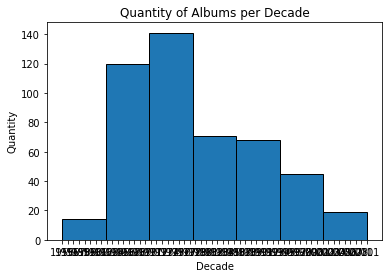

In [12]:
#list of years of all the albums
    years = sorted(list(map(lambda x: x['year'] , albums)))
    #separate by the tens place
    decades = {}
    quantity = 0
    #list(filter(lambda year : year[2] , years))
    for year in years:
        if (decades.get(year[2]) == None): #create new key
            decades[year[2]] = 1
        else:
            decades[year[2]] += 1 #increment quantity
    import numpy as np
    import matplotlib.pyplot as plt
    bins = len(list(decades.keys())) #how many bars
    quantities = list(decades.values()) #values by bar
    keylist = list(decades.keys())
    print(quantities)
    #ax = plt.subplot()
    #ax.set_xticks(decades.keys)
    plt.hist(years, bins, edgecolor='black')
    plt.xlabel('Decade')
    #ax.set_xticks(keylist)
    #ax.set_xticklabels(range(7))
    plt.ylabel('Quantity')
    plt.title('Quantity of Albums per Decade')
    #plt.xticks(np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue'))
    plt.show()